# Trends Analysis

#### In this file we do an exploration analysis (EDA):

1. Define the Problem: Understand shopping habits
2. Data Collection: Provided from kaggle
3. [Data Exploration](#data_exploration)


### In the Trend Prediction file
4. Time Series Analysis (if needed)
5. Feature Engineering
6. Select Modeling Approach
7. Model Training and Validation
8. Evaluation Metrics

### In the file Results
9. Interpret Results
10. Communicate Findings

### Monotoring
11. Iterative Improvement



### Data exploration<a id='data_exploration'></a>

- [Importing Libraries](#Importing_Libraries)
- [Loading the Dataset](#loading_dataset)
- [Checking the shape of the Dataset](#Shape)
- [Information about the Dataset](#information_dataset)
- [Checking if there are any null values present in the dataset or not ?](#nulls)
- [Checking if there are any duplicate values present in the dataset or not ?](#duplicates)
- [Analyse each column](#eda)



### Importing Libraries<a id='Importing_Libraries'></a>


In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset<a id='loading_dataset'></a>


In [2]:
df = pd.read_csv("Datasets/shopping_trends_updated.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.10,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.10,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.10,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.50,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.70,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Checking the shape of the Dataset<a id='Shape'></a>


In [3]:
print("Shape of df: ",df.shape)

print("Columns in df: ",df.columns)

Shape of df:  (3900, 18)
Columns in df:  Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')


### Information about the Dataset<a id='information_dataset'></a>


In [4]:
df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,"3,900.00","3,900.00","3,900.00","3,900.00","3,900.00"
mean,"1,950.50",44.07,59.76,3.75,25.35
std,"1,125.98",15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,"1,950.50",44.00,60.00,3.70,25.00
75%,"2,925.25",57.00,81.00,4.40,38.00
max,"3,900.00",70.00,100.00,5.00,50.00


### Checking if there are any null values present in the dataset or not ? <a id='nulls'></a>

In [5]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

### Checking if there are any duplicate values present in the dataset or not ? <a id='duplicates'></a>

In [6]:
df.duplicated().sum()

0

### Analyse each column <a id='eda'></a>
- [Gender](#gender)
- [Age](#age)
- [Category](#category)
- [Location](#location)
- [Size](#size)


- [Distribution analysis of categorical and Numerical data with support from my own toolkit](#distribution)

### <span style="color:lightgreen"> Gender <a id='gender'></a></span>:


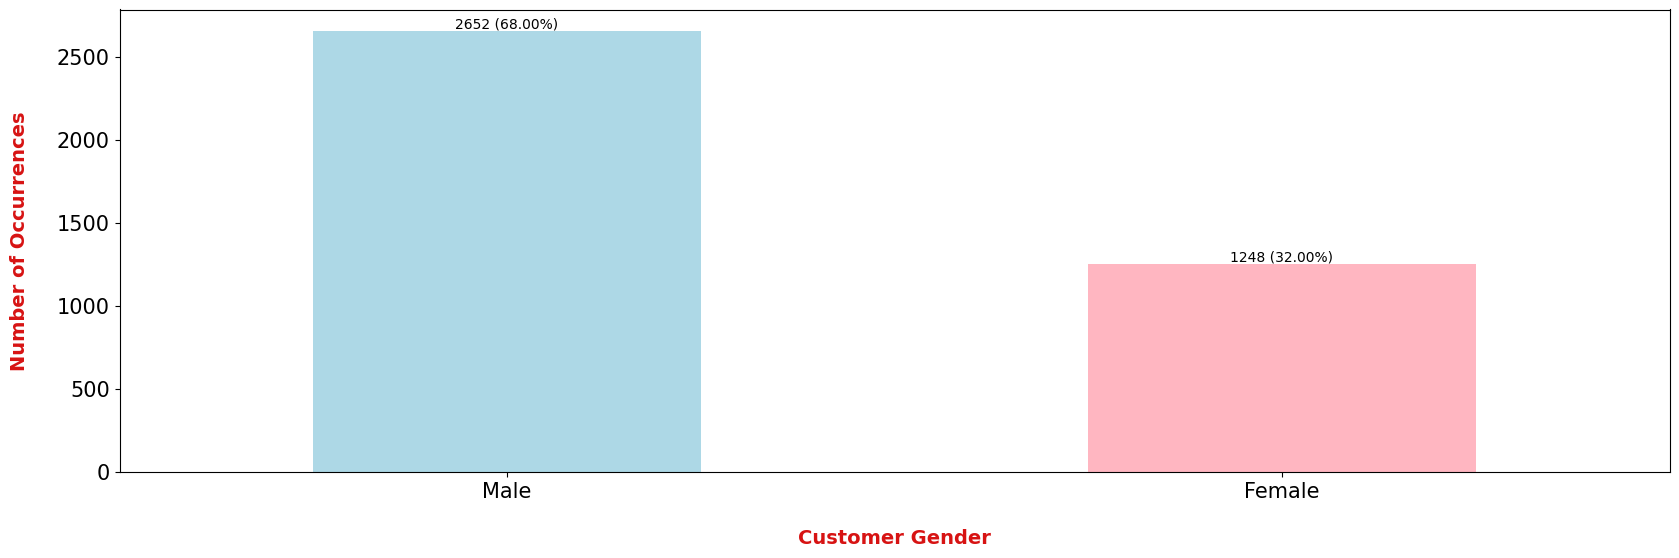

In [7]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

plt.figure(figsize=(20, 6))
ax = df["Gender"].value_counts().plot(kind='bar', rot=0, color=['lightblue', 'lightpink'])

ax.set_xticklabels(('Male', 'Female'))

total_count = len(df["Gender"])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_count:.2f}%'
    ax.annotate(f'{int(p.get_height())} ({percentage})', (p.get_x() + 0.25, p.get_height() + 1),
                ha='center', va='bottom', color='black')
    ax.tick_params(axis='both', labelsize=15)

plt.xlabel('Customer Gender', weight="bold", color="#D71313", fontsize=14, labelpad=20)
plt.ylabel('Number of Occurrences', weight="bold", color="#D71313", fontsize=14, labelpad=20)

plt.show()


### <span style="color:Lightyellow">Conclusion</span>:

- <span style="color:Lightblue">68% of customers are Male and 32% are Female</span>


### <span style="color:lightgreen"> Age <a id='age'></a></span>:


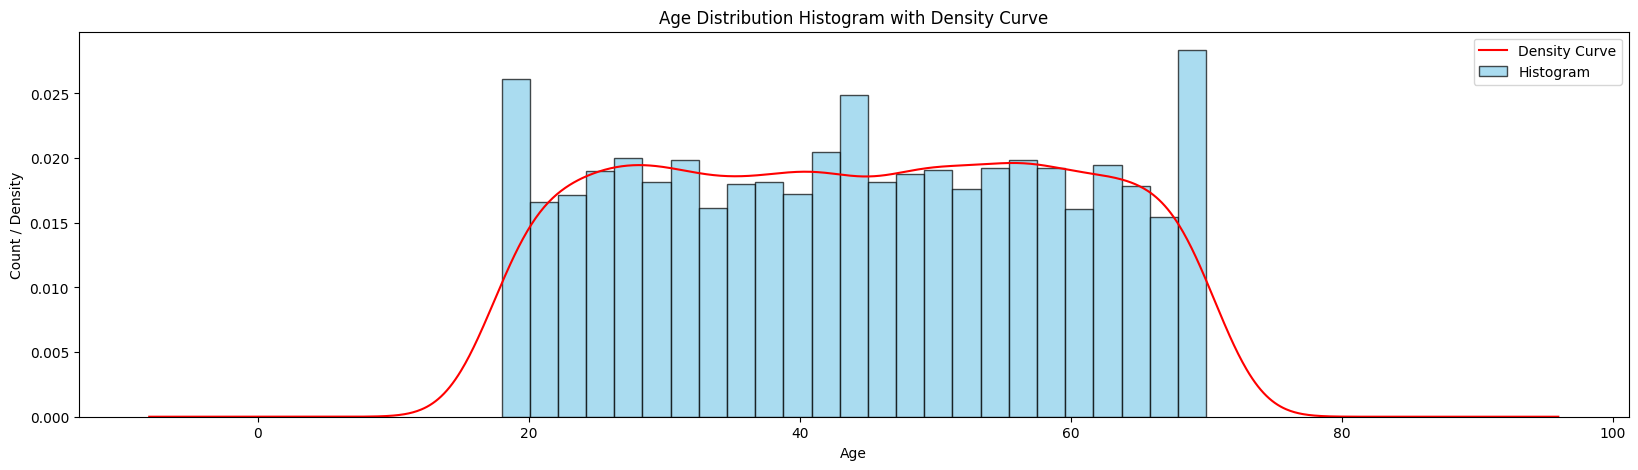

In [8]:
fig, ax = plt.subplots(figsize = (20, 5))

ax.hist(df['Age'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

### <span style="color:Lightyellow">Conclusion</span>:

- <span style="color:Lightblue">Uniform Distribution about the age of the customers. It means that individuals of any age within that range are equally likely, and there is no particular age group that stands out.</span>


### <span style="color:lightgreen"> Category <a id='category'></a></span>:


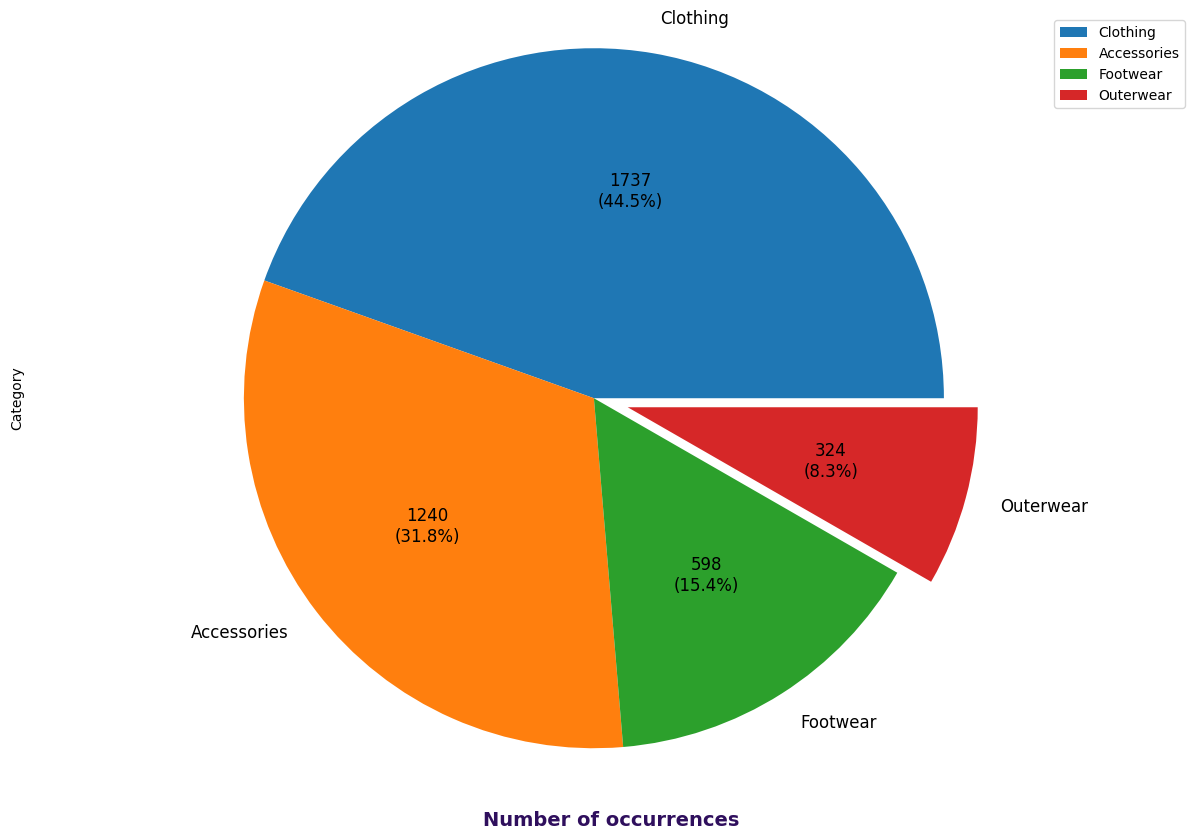

In [9]:

plt.figure(figsize=(15, 10))

# Get value counts and explode settings
counts = df["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

# Define a function to format autopct with counts and percentages
def func(pct, counts):
    absolute = int(pct / 100. * sum(counts))
    return f"{absolute}\n({pct:.1f}%)"

# Plot pie chart with custom autopct
ax = counts.plot(kind='pie', fontsize=12, explode=explode, autopct=lambda pct: func(pct, counts))
plt.xlabel('Number of occurrences', weight="bold", color="#2F0F5D", fontsize=14, labelpad=20)
plt.axis('equal')
plt.legend(labels=counts.index, loc="best")

plt.show()


<Figure size 2000x1000 with 0 Axes>

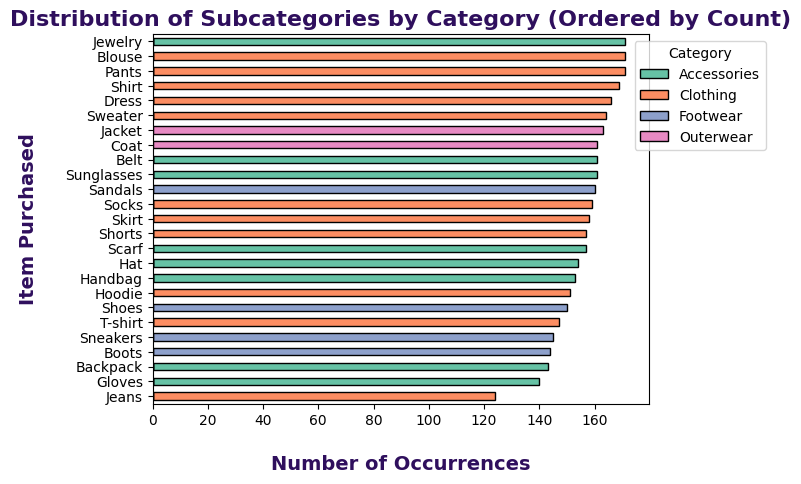

In [10]:

# Assuming 'Category' is a column in your DataFrame
df['Category'] = pd.Categorical(df['Category'])
category_colors = sns.color_palette("Set2", len(df['Category'].cat.categories))

plt.figure(figsize=(20,10))

# Group by 'Item Purchased' and sum the counts for each category
subcategory_counts = df.groupby(['Item Purchased', 'Category']).size().unstack()

# Calculate total counts for each subcategory
total_counts = subcategory_counts.sum(axis=1)

# Sort subcategories by total count in descending order
sorted_subcategories = total_counts.sort_values(ascending=True).index

# Reorder the DataFrame based on the sorted subcategories
subcategory_counts_sorted = subcategory_counts.loc[sorted_subcategories]

# Plot horizontal bar chart
subcategory_counts_sorted.plot(kind='barh', stacked=True, color=category_colors, edgecolor='black')

plt.xlabel('Number of Occurrences', weight='bold', color='#2F0F5D', fontsize=14, labelpad=20)
plt.ylabel('Item Purchased', weight='bold', color='#2F0F5D', fontsize=14, labelpad=20)
plt.title('Distribution of Subcategories by Category (Ordered by Count)', weight='bold', color='#2F0F5D', fontsize=16)

# Add legend with category labels and colors
plt.legend(title='Category', labels=df['Category'].cat.categories, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()


### <span style="color:Lightyellow">Conclusion</span>:

- <span style="color:Lightblue">Clothing and Acessories make more than 76% of sales</span>
- <span style="color:Lightblue">Jewelry, Blouse, Pants, Shirt and Dress the top 5 items purched</span>


### <span style="color:lightgreen"> Location <a id='location'></a></span>:


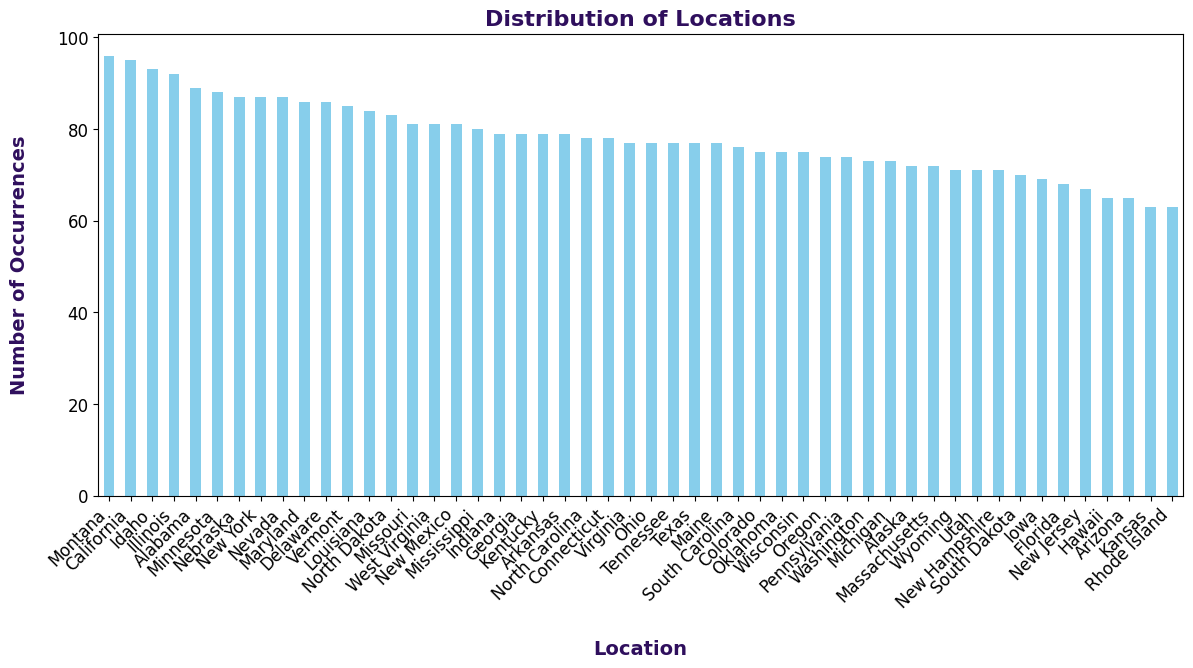

In [11]:

plt.figure(figsize=(14, 6))

# Get value counts for locations
location_counts = df["Location"].value_counts()

# Plot bar chart
ax = location_counts.plot(kind='bar', color='skyblue')


plt.xlabel('Location', weight='bold', color='#2F0F5D', fontsize=14, labelpad=20)
plt.ylabel('Number of Occurrences', weight='bold', color='#2F0F5D', fontsize=14, labelpad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of Locations', weight='bold', color='#2F0F5D', fontsize=16)

plt.show()


### <span style="color:Lightyellow">Conclusion</span>:

- <span style="color:Lightblue">Uniform distribution</span>

### <span style="color:lightgreen"> Size <a id='size'></a></span>:


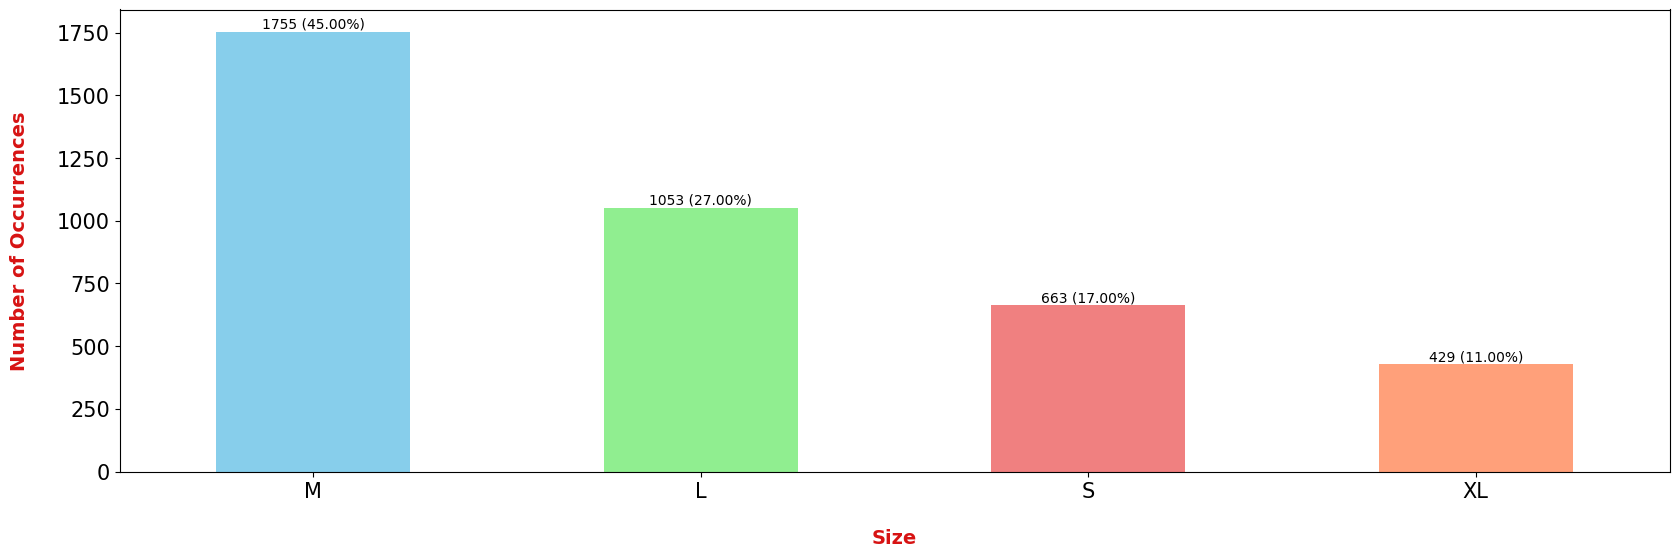

In [12]:

plt.figure(figsize=(20, 6))

# Get value counts for sizes
size_counts = df["Size"].value_counts()

# Define custom colors for each size
custom_colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

# Plot bar chart with custom colors
ax = size_counts.plot(kind='bar', rot=0, color=custom_colors)

total_count = len(df["Size"])

for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_count:.2f}%'
    ax.annotate(f'{int(p.get_height())} ({percentage})', (p.get_x() + 0.25, p.get_height() + 1),
                ha='center', va='bottom', color='black')
    ax.tick_params(axis='both', labelsize=15)

plt.xlabel('Size', weight="bold", color="#D71313", fontsize=14, labelpad=20)
plt.ylabel('Number of Occurrences', weight="bold", color="#D71313", fontsize=14, labelpad=20)

plt.show()


### <span style="color:Lightyellow">Conclusion</span>:

- <span style="color:Lightblue">45% of the products sold are M size, followed by L with 27%</span>

# <span style="color:lightgreen"> Distribution <a id='distribution'></a></span>



In [13]:
# Assuming df is your DataFrame

# main_script.py
import sys
import os

dir = os.path.dirname('../Toolkit/DataExplorationToolkit.py')
sys.path.append(dir)

import DataExplorationToolkit as dtl
feature_selector = dtl.FeatureSelector()
visualizer=dtl.Visualization()
data_quality=dtl.DataQuality()

In [14]:
cat_cols,num_cols,text_cols=feature_selector.return_categorical_numerical_columns(df,['Customer ID'],['Item Purchased','Location','Color'])

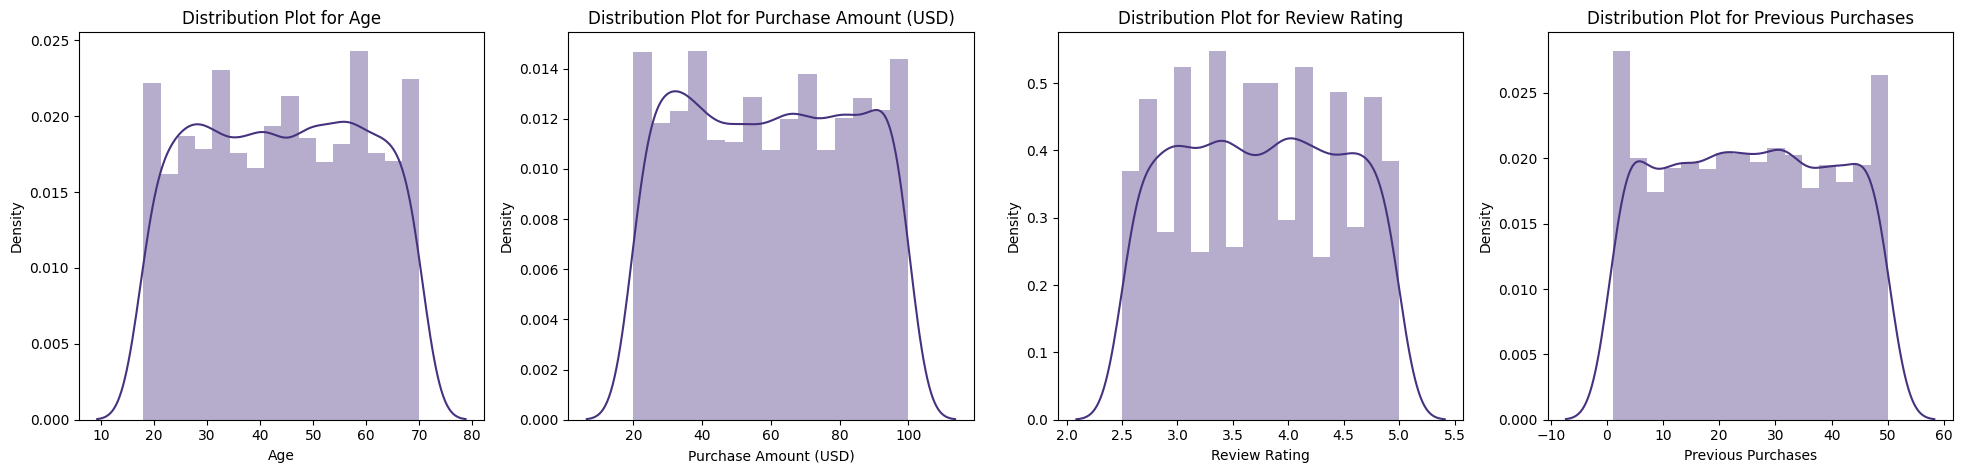

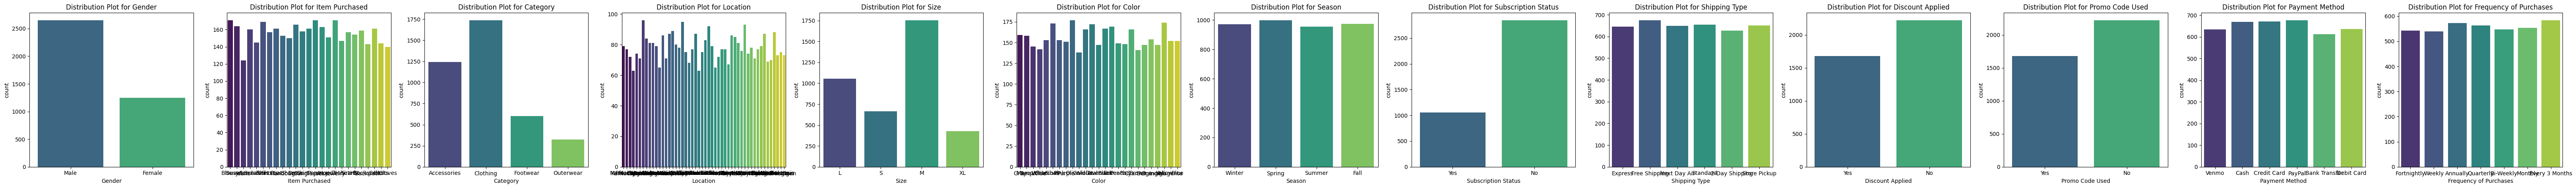

In [15]:
visualizer.plot_distribution(df,num_cols,cat_cols) 